In [6]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [7]:
os.getenv('PUIDATA')

'/home/cusp/dhi211/PUIdata'

In [8]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [9]:
datestring = '201707'
#getCitiBikeCSV(datestring)

In [10]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [11]:
df = pd.read_csv('/gws/open/Student/citibike/' + datestring + '-citibike-tripdata.csv.zip', compression='zip')

In [12]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [13]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

# Idea:
Rides conducted by users labeled 'Customer' have longer trip durations on average than rides conducted by users labeled 'Subscribers.'

# Null Hypothesis:
Rides conducted by users labeled 'Customer' have shorter or equal trip durations on average than rides conducted by users labeled 'Customer' with a significance level of alpha = 0.05

# Alternative Hypothesis:
Rides conducted by users labeled 'Subscribers' have longer trip durations on average than rides conducted by users labeled 'Customers.' 

In [14]:
#df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
#df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
#df.head()



In [15]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735599 entries, 0 to 1735598
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(5), object(5)
memory usage: 198.6+ MB


In [17]:
df2 = df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'birth year', u'gender'], axis=1)

In [18]:
df2.head()

,tripduration,usertype
0,364,Subscriber
1,2142,Subscriber
2,328,Subscriber
3,2530,Subscriber
4,2534,Subscriber


In [19]:
df3 = df2.dropna(how = 'any')
print (df.info())
print (df2.info())
print (df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735599 entries, 0 to 1735598
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(5), object(5)
memory usage: 198.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735599 entries, 0 to 1735598
Data columns (total 2 columns):
tripduration    int64
usertype        object
dtypes: int64(1), object(1)
memory usage: 26.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735599 entries, 0 to 1735598
Data columns (t

In [26]:
index_of_subscribers = [i for i,j in enumerate(df2['usertype']) if j == 'Subscriber']

In [28]:
subscriber_trip_durations = df2['tripduration'][index_of_subscribers]

In [30]:
index_of_customers = [i for i,j in enumerate(df2['usertype']) if j == 'Customer']

In [31]:
customer_trip_durations = df2['tripduration'][index_of_customers]

In [36]:
means = [np.mean(subscriber_trip_durations), np.mean(customer_trip_durations)]

names = ['Subscriber', 'Customer']

In [37]:
df3 = pd.DataFrame(means,names)
df3.columns = ['means']

df3

,means
Subscriber,854.975088
Customer,2215.592281


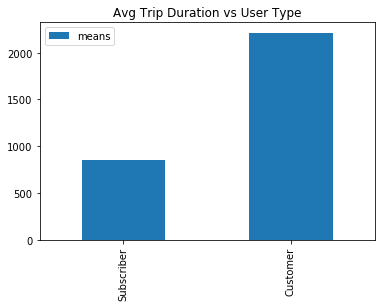

In [39]:
df3.plot.bar()

plt.title('Avg Trip Duration vs User Type')